# Refactored demo

This notebook is a *light* front-end; most functions/classes live in `qlg_refactor/`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj

from qlg_refactor.state_prep import SP_bosonic
from qlg_refactor.plotting import plot_wigner_2mod


In [2]:
# ==== State preparation example ====
Nt, Np, delta = 32, 11, 1.0
states = 'Bio'

Hmat, Fstate, FU, xopt, F_opt, payload = SP_bosonic(states, Np, Nt, delta, logical=0)
psi_target, psif_before, psif_opt, U_est, U_before, Flist_before, Flist_opt = payload

print('Fidelity of QLG:', Fstate)
print('Fidelity of QLG with optimal control:', F_opt)


Fidelity of QLG: 0.9729899459482052
Fidelity of QLG with optimal control: 0.9999993701675501


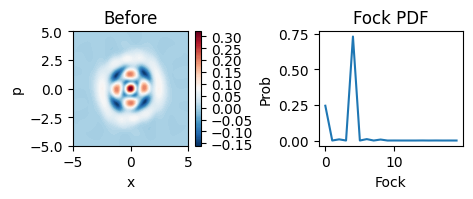

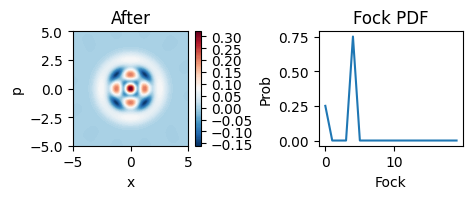

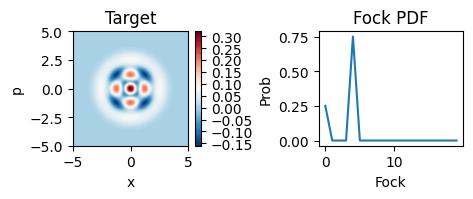

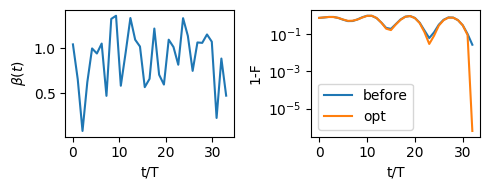

In [3]:
# ==== Visualizations ====
plot_wigner_2mod(Qobj(psif_before), xvec=np.linspace(-5, 5, 200), title='Before')
plot_wigner_2mod(Qobj(psif_opt), xvec=np.linspace(-5, 5, 200), title='After')
plot_wigner_2mod(Qobj(psi_target), xvec=np.linspace(-5, 5, 200), title='Target')

plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
plt.plot(np.linspace(0, len(xopt), len(xopt)), xopt)
plt.xlabel('t/T'); plt.ylabel(r'$\beta(t)$')

plt.subplot(1,2,2)
plt.plot(1-np.array(Flist_before), label='before')
plt.plot(1-np.array(Flist_opt), label='opt')
plt.yscale('log')
plt.xlabel('t/T'); plt.ylabel('1-F')
plt.legend()
plt.tight_layout()
plt.show()


## Gate synthesis example (Bio)

As an example, we use the **Binomial code (Bio)** as a logical code， and synthesis the H gate with pulse optimization.

F_gate_before: 0.9568317008047762
F_gate_opt   : 0.9999999864706194


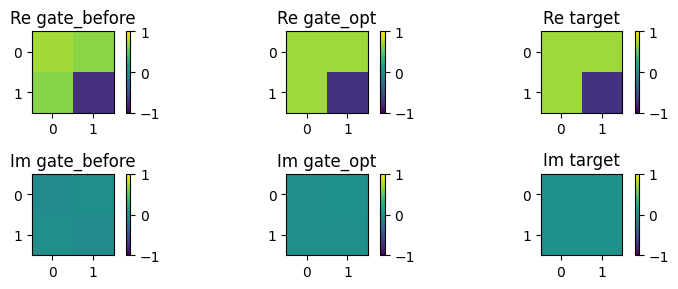

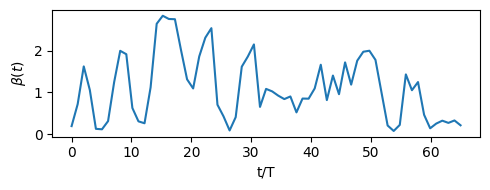

In [5]:
# ==== Gate synthesis example (Bio) ====
from qlg_refactor.single_qubit_gates import H
from qlg_refactor.gate_synthesis import (
    gate_bosonic_gate_vlist,
    gate_bosonic_gate,
    global_phase,
)

# Small-ish parameters for a quick demo (feel free to increase Np/Nt for better performance)
Nt, delta = 64, 2.0
states = "Bio"
Np = 10

gate = H  # target logical gate (2x2)

# Build the logical embedding operators / coefficient lists
Vlist, Q, cnm_list = gate_bosonic_gate_vlist(gate, Np, Nt, delta, states)

# Optimize controls to synthesize the target gate
F_gate_before, gate_before, F_gate_opt, gate_opt, xopt_gate = gate_bosonic_gate(
    gate, Np, Nt, delta, Vlist, Q
)

print("F_gate_before:", F_gate_before)
print("F_gate_opt   :", F_gate_opt)

# Visualize matrices (phase-aligned)
gate_before1 = np.exp(1j * global_phase(gate_before, gate)) * gate_before
gate_opt1    = np.exp(1j * global_phase(gate_opt, gate)) * gate_opt

plt.figure(figsize=(8, 3))
vmin, vmax = -1, 1
plt.subplot(2, 3, 1); plt.title("Re gate_before"); plt.imshow(np.real(gate_before1), vmin=vmin, vmax=vmax); plt.colorbar()
plt.subplot(2, 3, 2); plt.title("Re gate_opt");    plt.imshow(np.real(gate_opt1),    vmin=vmin, vmax=vmax); plt.colorbar()
plt.subplot(2, 3, 3); plt.title("Re target");      plt.imshow(np.real(gate),         vmin=vmin, vmax=vmax); plt.colorbar()

plt.subplot(2, 3, 4); plt.title("Im gate_before"); plt.imshow(np.imag(gate_before1), vmin=vmin, vmax=vmax); plt.colorbar()
plt.subplot(2, 3, 5); plt.title("Im gate_opt");    plt.imshow(np.imag(gate_opt1),    vmin=vmin, vmax=vmax); plt.colorbar()
plt.subplot(2, 3, 6); plt.title("Im target");      plt.imshow(np.imag(gate),         vmin=vmin, vmax=vmax); plt.colorbar()

plt.tight_layout()
plt.show()

# Control waveform
plt.figure(figsize=(5, 2))
plt.plot(np.linspace(0, len(xopt_gate), len(xopt_gate)), xopt_gate)
plt.xlabel("t/T")
plt.ylabel(r"$\beta(t)$")
plt.tight_layout()
plt.show()